In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

from sklearn.feature_extraction import DictVectorizer


from sklearn.linear_model import LogisticRegression

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv('AB_NYC_2019.csv')
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
work_columns = ['neighbourhood_group', 'room_type', 
                'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [6]:
df = dataset[work_columns]

# fill missing value
df = df.fillna(0)
df.sample(5)

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
47891,Brooklyn,Entire home/apt,40.66365,-73.94611,135,3,0,0.00,1,9
29113,Brooklyn,Entire home/apt,40.65600,-73.89719,80,1,139,7.65,1,77
39378,Brooklyn,Entire home/apt,40.69793,-73.93141,93,3,5,0.78,1,0
43978,Queens,Private room,40.75925,-73.92506,45,1,6,2.31,5,342
15767,Manhattan,Private room,40.73328,-73.98590,90,3,23,0.60,1,0


## EDA

In [7]:
df.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
numerical_columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

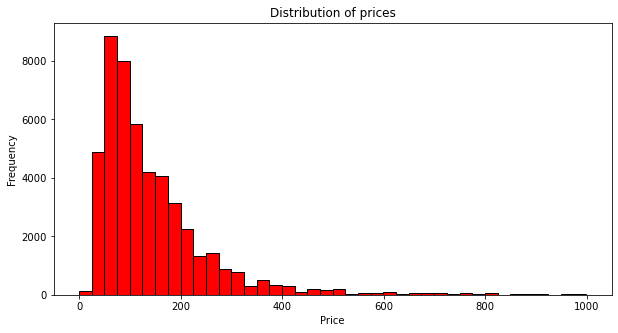

In [10]:
plt.figure(figsize=(10, 5))

sns.histplot(df.price[df.price < 1000], bins=40, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

### Question 1

What is the most frequent observation (mode) for the column ```'neighbourhood_group'```?

In [11]:
df['neighbourhood_group'].value_counts()

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten_island      373
Name: neighbourhood_group, dtype: int64

Answer 1: manhattan

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the ```train_test_split``` function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.


In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [13]:
df_train.shape, df_val.shape, df_test.shape

((29337, 10), (9779, 10), (9779, 10))

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train[['price']]
y_val = df_val[['price']]
y_test = df_test[['price']]

del df_train['price']
del df_val['price']
del df_test['price']

### Question 2

* Create the correlation matrix for the numerical features of your train dataset.
    * in a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset).
* What are the two features that have the biggest correlation in this dataset?


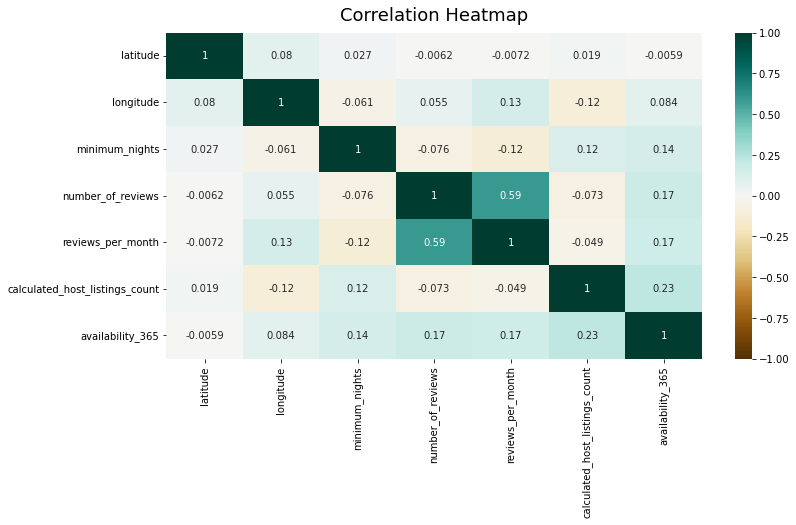

In [16]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Answer 2: ``number_of_reviews`` and ``reviews_per_month``

## Make price binary


* We need to turn the price variable from numeric into binary.
* Let's create a variable ``above_average`` which is ``1`` if the price is above (or equal to) ``152``.


In [17]:
y_train.loc[:, 'above_average'] = (y_train['price'] >= 152).astype(int)
y_val.loc[:, 'above_average'] = (y_val['price'] >= 152).astype(int)
y_test.loc[:, 'above_average'] = (y_test['price'] >= 152).astype(int)

# del y_train['price']
# del y_val['price']
# del y_test['price']

/opt/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [18]:
print(y_train['above_average'].value_counts(normalize=True))
print()
print(y_val['above_average'].value_counts(normalize=True))
print()
print(y_test['above_average'].value_counts(normalize=True))

0    0.694175
1    0.305825
Name: above_average, dtype: float64

0    0.693425
1    0.306575
Name: above_average, dtype: float64

0    0.700072
1    0.299928
Name: above_average, dtype: float64


## Question 3


* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using ``round(score, 2)``



In [19]:
def mutual_info_price_score(series):
    return mutual_info_score(series, df_full_train.price)

In [20]:
mi = df_full_train[categorical_columns].apply(mutual_info_price_score)
round(mi.sort_values(ascending=False), 2)

room_type              0.31
neighbourhood_group    0.11
dtype: float64

Answer 3: room_type

## Question 4

* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset. 
* * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
* * ``model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)``
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

## One-hot encoding

* Use Scikit-Learn to encode categorical features

In [21]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

## Logistic regression

In [22]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train['above_average'].values.ravel())

y_pred_val = model.predict(X_val)
y_pred_val

array([0, 1, 0, ..., 0, 0, 1])

In [23]:
accuracy_val = (y_pred_val == y_val['above_average'].values.ravel()).mean()
round(accuracy_val, 2)

0.79

Answer 4: 0.79

## Question 5


* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * `neighbourhood_group`
    * `room_type`
    * `number_of_reviews`
    * `reviews_per_month`

> **note**: the difference doesn't have to be positive

In [24]:
all_columns = categorical_columns + numerical_columns

for col in all_columns:
    _columns = all_columns.copy()
    _columns.remove(col)
#     print('_columns =', _columns)
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[_columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val[_columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
    model.fit(X_train, y_train['above_average'].values.ravel())
    
    y_pred_val = model.predict(X_val)
    
    accuracy_val_col = (y_pred_val == y_val['above_average'].values.ravel()).mean()
    
    if col in ['neighbourhood_group', 'room_type', 'number_of_reviews', 'reviews_per_month']:
    
        print('col =', col, 'different = ', 100 * (accuracy_val - accuracy_val_col))
        print('\n')

col = neighbourhood_group different =  4.090397791185197


col = room_type different =  6.084466714387982


col = number_of_reviews different =  -0.07158196134573469


col = reviews_per_month different =  0.0




Answer 5: reviews_per_month

## Question 6


* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [25]:
from sklearn.linear_model import Ridge

In [26]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [27]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[all_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val[all_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
y_train.loc[:, 'log1p_price'] = np.log1p(y_train['price'])
y_val.loc[:, 'log1p_price'] = np.log1p(y_val['price'])
y_test.loc[:, 'log1p_price'] = np.log1p(y_test['price'])

In [32]:
for r in [0, 0.01, 0.1, 1, 10]:
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(X_train, y_train['log1p_price'].values.ravel())
    y_val_ridge = model_ridge.predict(X_val)
    
    print('alpha =', r, '    ', round(rmse(y_val['log1p_price'].values.ravel(), y_val_ridge), 3))

alpha = 0      0.497
alpha = 0.01      0.497
alpha = 0.1      0.497
alpha = 1      0.497
alpha = 10      0.498


Answer 6: alpha = 0